In [2]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os.path

In [3]:
def compute_error(energy_dict, fyr=1971., lyr=2018., ZJ=True):
    """
    This function computes the combined error in the energy inventory (component) for two specified 
    years and can return the result in zettajoules (default) or Watts per square metre. 
    """
    nyrs = lyr - fyr
    ZJtoW = 1e21 / (5.1e14 * 31557600 * nyrs)  # Conversion factor Zetta Joules to Watts per square metre

    yrs = energy_dict['yrs'] - 0.5 # Express as integer years
    ind1 = np.where(yrs == fyr)[0][0]
    ind2 = np.where(yrs == lyr)[0][0]
    err1 = energy_dict['ocean_0-700m_error'][ind1] + energy_dict['ocean_700-2000m_error'][ind1] # State error 1
    err2 = energy_dict['ocean_0-700m_error'][ind2] + energy_dict['ocean_700-2000m_error'][ind2] + (energy_dict['ocean_2000-6000m_error'][ind2] - energy_dict['ocean_2000-6000m_error'][ind1]) # State error 2 + Flux Error  
    
    total_err = np.sqrt(np.square(err1) + np.square(err2))
    if ZJ == True:
        return total_err
    else:
        return total_err * ZJtoW

def compute_delta(energy_dict, fyr=1971., lyr=2018., comp='Total', ZJ=True):
    """
    This function computes the change in the energy inventory (component) between two specified 
    years and can return the result in zettajoules (default) or Watts per square metre. 
    """
    nyrs = lyr - fyr
    ZJtoW = 1e21 / (5.1e14 * 31557600 * nyrs)  # Conversion factor Zetta Joules to Watts per square metre
    yrs = energy_dict['yrs'] - 0.5 # Express as integer years
    ind1 = np.where(yrs == fyr)[0][0]
    ind2 = np.where(yrs == lyr)[0][0]
    delta = energy_dict[comp][ind2] - energy_dict[comp][ind1]
    if ZJ == True:
        return delta
    else:
        return delta * ZJtoW

In [4]:
#datadir = os.path.expanduser('~/python/ar6/src/notebooks/data/') 
datadir = os.path.expanduser('~/python/IGCC/src/notebooks/data/') 
#pfile   = 'IPCC_AR6_update_energy_timeseries_1971to2022_2023-04-17.pickle' 
pfile   = 'IGCC_AR6_update_energy_timeseries_1971to2023_2024-04-13.pickle'

# Specify start and end year of period
fyr=1971.5
lyr=2023.5
pstr = str(int(fyr)) + '-' + str(int(lyr)) # period as a string

energy_dict = pickle.load( open( datadir + pfile, 'rb' ) )

ratio = 1.0/0.91 # Ratio to scale up ocean heat content to change to total energy inventory 

series1 = energy_dict['Total']
series2 = energy_dict['ocean_full-depth']

series1[-3:] = series2[-3:] * ratio # Use OHC as a proxy for total energy change in 2021 and 2022. 

energy_dict['Total'] = series1 

print(series1)
print(energy_dict.keys())
print(energy_dict['yrs'])

[  1.54098582  11.77562452   4.25804291  15.76150775  11.99020804
  29.38713272  28.53845182  44.50792528  60.28799377  82.07973754
  91.15480707  77.9049049   65.00633235  59.52055723  71.5002179
  82.42361373 103.26078169 117.1024239  128.5442364  133.33949147
 131.6276436  139.14744393 143.77798104 143.90636445 152.42417178
 165.79497989 166.83317806 162.52557006 159.58518401 174.3664909
 202.99225667 223.13101012 248.28577548 258.74891165 274.00999188
 282.01181806 294.09087708 305.03541783 316.57607404 328.12117201
 337.64316209 354.9305599  368.30964013 383.83695845 394.9857702
 413.12702587 420.58234099 435.31099123 448.71318826 473.01771325
 493.69929372 512.09270031 523.4795135 ]
dict_keys(['yrs', 'atmosphere', 'cryosphere', 'land', 'ocean_0-700m', 'ocean_0-700m_error', 'ocean_700-2000m', 'ocean_700-2000m_error', 'ocean_2000-6000m', 'ocean_2000-6000m_error', 'ocean_full-depth', 'Total', 'Units'])
[1971.5 1972.5 1973.5 1974.5 1975.5 1976.5 1977.5 1978.5 1979.5 1980.5
 1981.5 19

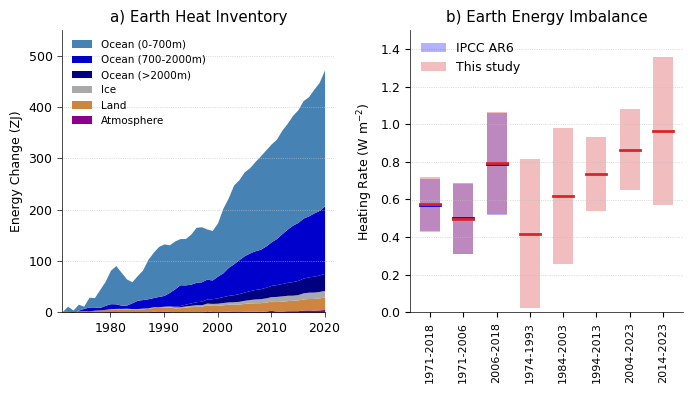

In [5]:
# Plot Figure
plotdir = os.path.expanduser('~/python/IGCC/src/notebooks/plots/')
plotfile1 = 'IGCC_update_energy_timeseries_1971to2023_2024-04-13.png' 
plotfile2 = 'IGCC_update_energy_timeseries_1971to2023_2024-04-13.pdf'

e_comps = ['atmosphere', 'land', 'cryosphere', 
           'ocean_2000-6000m', 'ocean_700-2000m', 'ocean_0-700m']

plt.figure(1)
f = plt.gcf()
f.set_size_inches(7.0, 4.0)
matplotlib.rcParams['font.size']=9
matplotlib.rcParams['axes.linewidth']=0.5 # set the value globally

yrs = energy_dict['yrs'] - 0.5 # Integer years for plotting purposes. 

xmin, xmax = 1971, 2022
hcmin, hcmax = 0.0, 550.

color_dict = {'atmosphere':'darkmagenta',
              'seaice':'silver',
              'cryosphere':'darkgrey',
              'landwater':'peru',
              'land':'peru',
              'antarctica':'slategrey',
              'greenland':'darkgrey',
              'glaciers':'lightgray', 
              'ocean_0-700m':'steelblue', 
              'ocean_700-2000m':'mediumblue',
              'ocean_0-2000m':'mediumblue',
              'ocean_full-depth':'mediumblue', 
              'ocean_2000-6000m':'navy',
              'tidegauge':'k', 
              'component_sum':'r',
              'energy_error':'r'}

label_dict = {'atmosphere':'Atmosphere',
              'seaice':'Sea ice',
              'cryosphere':'Ice',
              'landwater':'Land Water Storage',
              'land':'Land',
              'antarctica':'Antarctica',
              'greenland':'Greenland',
              'glaciers':'Glaciers', 
              'ocean_0-700m':'Ocean (0-700m)', 
              'ocean_700-2000m':'Ocean (700-2000m)',
              'ocean_700-2000m_ishii':'Ocean (700-2000m)',
              'ocean_0-2000m':'Ocean (0-2000m)',
              'ocean_full-depth':'Ocean', 
              'ocean_2000-6000m':'Ocean (>2000m)',
              'gmsl':'GMSL total', 
              'Total':'Component total'}

# Plot panel a), the energy inventory timeseries.. 

ax1 = plt.subplot(1, 2, 1)
series = np.zeros(len(yrs)) # Initialise empty time series for plotting

# Plot horizontal lines to aid reading figure
for val in [100., 200., 300., 400., 500.]:
    ax1.plot([xmin, xmax],[val, val], color='silver', linestyle=':', linewidth=0.5)

for cc, comp in enumerate(e_comps):
    label = label_dict[comp]
    newseries = series + energy_dict[comp]
    plt.fill_between(yrs, series, newseries, color=color_dict[comp], label=label, linewidth=0.0)
    series = newseries

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels), loc='upper left', frameon=False, fontsize=7.5, edgecolor='w')    
ax1.set_title('a) Earth Heat Inventory')
ax1.set_ylabel('Energy Change (ZJ)')
ax1.set_xlim(xmin, xmax)
ax1.set_xticks([1980, 1990, 2000, 2010, 2020])
ax1.set_ylim(hcmin, hcmax)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_bounds(low=1971,high=2020)
ax1.tick_params(width=0.5)


# Now focus on panel b), the heating rates for EEI..  

alpha = 0.3 # Set transparency parameter

syrs = [1974., 1984., 1994., 2004., 2014.]  # List of start years
eyrs = [1993., 2003., 2013., 2023., 2023.]  # List of end years

ar6_syrs = [1971., 1971., 2006.]
ar6_eyrs = [2018., 2006., 2018.]

# Central estimates and +/- error for very likely ranges in W m-2
# Values based on Table 7.1 in Forster et al (2021) IPCC AR6 WG1. 
ar6_dict = {'1971-2018':[0.57,0.14], 
            '1993-2018':[0.72,0.17], 
            '2006-2018':[0.79, 0.27],
            '1971-2006':[0.50, 0.19]}

wmin, wmax = 0.0, 1.5 # Max and min for Watts per square meter
xmin, xmax = -0.6, 7.6

ax2 = plt.subplot(1, 2, 2)

labels=[] # Define an empty list for year labels

for val in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]:
    ax2.plot([xmin, xmax],[val, val], color='silver', linestyle=':', linewidth=0.5)
    
for ss1, syr in enumerate(ar6_syrs):
    xpts = [ss1-0.3, ss1+0.3]
    color = 'tab:red'
    eyr = ar6_eyrs[ss1]
    label = str(int(syr)) + '-' + str(int(eyr))
    labels.append(label)
    delta, error = ar6_dict[str(int(syr))+'-'+str(int(eyr))]
    label1 = None
    label2 = None
    if ss1 == 0:
        label1 = 'IPCC AR6'
        label2 = 'This study'
    ax2.fill_between(xpts, delta-error, delta+error, facecolor='blue', alpha=alpha, label=label1)
    ax2.plot(xpts, [delta, delta], linewidth=2.0, color='blue')   

    delta = compute_delta(energy_dict, fyr=syr, lyr=eyr, comp='Total', ZJ=False)
    error = compute_error(energy_dict, fyr=syr, lyr=eyr, ZJ=False)
    ax2.fill_between(xpts, delta-error*1.645, delta+error*1.645, facecolor=color, alpha=alpha, label=label2)
    ax2.plot(xpts, [delta, delta], linewidth=2.0, color=color)
ss1 +=1
    
for ss, syr in enumerate(syrs):
    xpts = [ss+ss1-0.3, ss+ss1+0.3]
    color = 'tab:red'
    eyr = eyrs[ss]
    label = str(int(syr)) + '-' + str(int(eyr))
    labels.append(label)
    delta = compute_delta(energy_dict, fyr=syr, lyr=eyr, comp='Total', ZJ=False)
    error = compute_error(energy_dict, fyr=syr, lyr=eyr, ZJ=False)
    ax2.fill_between(xpts, delta-error*1.645, delta+error*1.645, facecolor=color, alpha=alpha)
    ax2.plot(xpts, [delta, delta], linewidth=2.0, color=color)
ax2.legend(loc='upper left', frameon=False)
    
ax2.set_ylim(wmin, wmax)
ax2.set_xlim(xmin, xmax)
ax2.set_title('b) Earth Energy Imbalance')
ax2.set_ylabel('Heating Rate (W m$^{-2}$)')
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax2.set_xticklabels(labels,rotation=90, fontsize=8)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.grid(color='grey', linestyle=':')
#ax2.set_xticklabels(labels)
plt.tight_layout()
#print("Saving file: ", plotdir+plotfile1)
#print("Saving file: ", plotdir+plotfile2)
#plt.savefig(plotdir+plotfile1,dpi=300,format='png')
#plt.savefig(plotdir+plotfile2,dpi=300,format='pdf')
plt.show()


In [6]:
# Print the very likely ranges in estimated EEI for different periods.. 

dp = 2 # Set number of decimal places

syrs = [1971., 1971., 2006., 1976., 2011]  # List of start years
eyrs = [2018., 2006., 2018., 2023., 2023]  # List of end years

for ss, syr in enumerate(syrs):
    eyr = eyrs[ss]
    label = str(int(syr)) + '-' + str(int(eyr)) + ':'
    D = compute_delta(energy_dict, fyr=syr, lyr=eyr, comp='Total', ZJ=False)
    E = compute_error(energy_dict, fyr=syr, lyr=eyr, ZJ=False)
    text = str(np.round(D, decimals=dp)) + ' [' + str(np.round(D - E*1.645, decimals=dp)) + ' to ' + str(np.round(D + E*1.645, decimals=dp)) + ']'
    print(label, text)

# This part prints the % contributions for the different energy components..  

#    for comp in ['ocean_full-depth', 'ocean_0-700m', 'ocean_700-2000m', 'ocean_2000-6000m','land','cryosphere','atmosphere']:
#        d = compute_delta(energy_dict, fyr=syr, lyr=eyr, comp=comp, ZJ=False)
#        pc_text = str(np.round(d/D * 100.0, decimals=1))
#        print(comp + ' = ', pc_text)
#    print()

1971-2018: 0.57 [0.43 to 0.72]
1971-2006: 0.5 [0.31 to 0.68]
2006-2018: 0.79 [0.52 to 1.07]
1976-2023: 0.65 [0.48 to 0.82]
2011-2023: 0.96 [0.67 to 1.26]


In [7]:
# Print the very likely ranges in estimated EEI for different periods.. 

dp = 2 # Set number of decimal places

syrs = [1974., 1984., 1994., 2004., 2014]  # List of start years
eyrs = [1993., 2003., 2013., 2023., 2023]  # List of end years

for ss, syr in enumerate(syrs):
    eyr = eyrs[ss]
    label = str(int(syr)) + '-' + str(int(eyr)) + ':'
    D = compute_delta(energy_dict, fyr=syr, lyr=eyr, comp='Total', ZJ=False)
    E = compute_error(energy_dict, fyr=syr, lyr=eyr, ZJ=False)
    text = str(np.round(D, decimals=dp)) + ' [' + str(np.round(D - E*1.645, decimals=dp)) + ' to ' + str(np.round(D + E*1.645, decimals=dp)) + ']'
    print(label, text)

# This part prints the % contributions for the different energy components..  

#    for comp in ['ocean_full-depth', 'ocean_0-700m', 'ocean_700-2000m', 'ocean_2000-6000m','land','cryosphere','atmosphere']:
#        d = compute_delta(energy_dict, fyr=syr, lyr=eyr, comp=comp, ZJ=False)
#        pc_text = str(np.round(d/D * 100.0, decimals=1))
#        print(comp + ' = ', pc_text, '%')
#    print()

1974-1993: 0.42 [0.02 to 0.81]
1984-2003: 0.62 [0.25 to 0.98]
1994-2013: 0.73 [0.54 to 0.93]
2004-2023: 0.87 [0.65 to 1.08]
2014-2023: 0.96 [0.57 to 1.36]
